In [2]:
# Importing The Necessary Libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Loading Test And Train Data
train = pd.read_csv("/content/drive/MyDrive/ML Datasets/Regression/bigmart_train.csv")
test = pd.read_csv("/content/drive/MyDrive/ML Datasets/Regression/bigmart_test.csv")

In [4]:
# Train data shape
train.shape

(8523, 12)

In [5]:
# Test Data Shape
test.shape

(5681, 11)

In [6]:
# Columns in Test Dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
# Combining Test and Train Data to perform EDA
test["Source"] = "test"
train["Source"] = "train"
data = pd.concat([train, test], ignore_index= True)
data.shape

(14204, 13)

In [8]:
# Get a glimpse of data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
# Describe function for numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# Check For Null Values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [11]:
# Item Outlet Sales has 5681 missing values which we will predicting using model

In [12]:
# Unique Values in Item Fat Content Column
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
# Checking Unique values in outlet establishment year column
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [14]:
data["Outlet Age"] = 2023 - data["Outlet_Establishment_Year"]
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36


In [15]:
# Unique Values in Outlet Size Column
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
# Value Counts For Item Fat Content Column
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

We observe that low fat content is most popular

In [17]:
# Value Coounts in Outlet Size Colummn
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [18]:
# Two Columns have mmissingg Values Outlet Size and Item Weight
# Replacing Mising Values in Outlet Size with medium
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [19]:
# Replacing Missing Values in Item Weight Column with Median Value
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].dropna().median())

<Axes: >

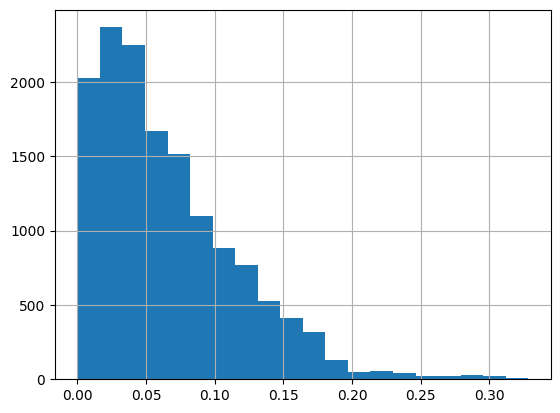

In [20]:
# Ploting a histogram to see distribution Of Item Visibility Collumn
data["Item_Visibility"].hist(bins = 20)

In [21]:
# Detecting Outliers using IQR approach
Q1 = data["Item_Visibility"].quantile(0.25)
Q3 = data["Item_Visibility"].quantile(0.755)
IQR = Q3 - Q1

In [22]:
# Remove Outliers from Data
fill_data = data.query("(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)")

In [23]:
# Glimpseof outlier free data
fill_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36


In [24]:
# Shape of Data Without Outliers
fill_data.shape

(13956, 14)

In [25]:
# Asign Fill Data to data dataframe
data = fill_data
data.shape

(13956, 14)

In [26]:
# Modify Item Visibility column by grouping numerical values into Low Visibility, Visibitlity and High Visibility
data["Item_visibility_Bins"] =  pd.cut(data["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz','High Viz'])

In [27]:
# Value Counts For Item Visibility Bins
data["Item_visibility_Bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1431
Name: Item_visibility_Bins, dtype: int64

In [28]:
# Replacing Null Values with Low Viz
data["Item_visibility_Bins"] = data["Item_visibility_Bins"].replace(np.nan, "Low Viz", regex = True)

In [29]:
# There was misrepresentation In Item_Fat_Content Column
# Replacing all misrepresentation of Low Fat with Low Fat

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
data['Item_Fat_Content'].value_counts()

Low Fat    9044
Regular    4722
reg         190
Name: Item_Fat_Content, dtype: int64

In [30]:
# Replacing all representation of reg with Regular
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg', 'Regular')
data['Item_Fat_Content'].value_counts()

Low Fat    9044
Regular    4912
Name: Item_Fat_Content, dtype: int64

In [31]:
# Tranform All Categorical Varibles To Numerical Using Label Encoder
le = LabelEncoder()

In [32]:
# Tranform Item_Fat_Content Column
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

In [33]:
# Tranform Item_visibility_Bins Column
data['Item_visibility_Bins'] = le.fit_transform(data['Item_visibility_Bins'])

In [34]:
# Tranform Outlet_Location_Type Column
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [35]:
# Tranform Outlet_Location_Type Column
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])

In [36]:
# Unique Values Of Outlet Type Variable
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [37]:
# Creating Dummies For Outlet Type Column
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [38]:
# Explore Item Identifier Column By Seeing It's Unique Values
data["Item_Identifier"].value_counts()

FDE33    10
NCF18    10
FDY02    10
FDS03    10
FDL52    10
         ..
FDX49     7
FDM50     7
DRN11     7
FDL50     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [39]:
# As multiple Categories are present in Item Identifier Column , Lets group them
data["Item_Identifier_Combined"] = data["Item_Identifier"].apply(lambda x : x[0:2])
data["Item_Identifier_Combined"].value_counts()

FD    10000
NC     2656
DR     1300
Name: Item_Identifier_Combined, dtype: int64

In [40]:
data["Item_Identifier_Combined"] = data["Item_Identifier_Combined"].map({'FD' : 'Food', 'NC' : 'Non Consumable', 'DR' : 'Drinks'})

In [41]:
data.shape

(13956, 16)

In [42]:
# Perform One Hot Encoding On Categorical Variables As model works on numerical values
data = pd.get_dummies(data, columns = ["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","Item_Identifier_Combined"])

In [43]:
data.dtypes

Item_Identifier                             object
Item_Weight                                float64
Item_Visibility                            float64
Item_Type                                   object
Item_MRP                                   float64
Outlet_Identifier                           object
Outlet_Establishment_Year                    int64
Item_Outlet_Sales                          float64
Source                                      object
Outlet Age                                   int64
Item_visibility_Bins                         int64
Item_Fat_Content_0                           uint8
Item_Fat_Content_1                           uint8
Outlet_Location_Type_0                       uint8
Outlet_Location_Type_1                       uint8
Outlet_Location_Type_2                       uint8
Outlet_Size_0                                uint8
Outlet_Size_1                                uint8
Outlet_Size_2                                uint8
Outlet_Type_Grocery Store      

In [44]:
# Drop Columns converted to different types
data.drop(["Item_Type", "Outlet_Establishment_Year"], axis = 1, inplace = True)

In [45]:
# Split Data back to test and train
train = data.loc[data["Source"] == "train"]
test = data.loc[data["Source"] == "test"]

In [46]:
# Drop Unnecessary Columns
train.drop(['Source'], axis = 1, inplace = True)
test.drop(['Source', 'Item_Outlet_Sales'], axis = 1, inplace = True)

<ipython-input-46-333898f8f062>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Source'], axis = 1, inplace = True)
<ipython-input-46-333898f8f062>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Source', 'Item_Outlet_Sales'], axis = 1, inplace = True)


In [47]:
# Exporting The Modified File

train.to_csv("/content/drive/MyDrive/ML Datasets/Regression/final_bigmart_train.csv")
test.to_csv("/content/drive/MyDrive/ML Datasets/Regression/final_bigmart_test.csv")

In [48]:
# Reading Modified Train and Test Data
train2 = pd.read_csv("/content/drive/MyDrive/ML Datasets/Regression/final_bigmart_train.csv")
test2 = pd.read_csv("/content/drive/MyDrive/ML Datasets/Regression/final_bigmart_test.csv")

In [49]:
train2.dtypes

Unnamed: 0                                   int64
Item_Identifier                             object
Item_Weight                                float64
Item_Visibility                            float64
Item_MRP                                   float64
Outlet_Identifier                           object
Item_Outlet_Sales                          float64
Outlet Age                                   int64
Item_visibility_Bins                         int64
Item_Fat_Content_0                           int64
Item_Fat_Content_1                           int64
Outlet_Location_Type_0                       int64
Outlet_Location_Type_1                       int64
Outlet_Location_Type_2                       int64
Outlet_Size_0                                int64
Outlet_Size_1                                int64
Outlet_Size_2                                int64
Outlet_Type_Grocery Store                    int64
Outlet_Type_Supermarket Type1                int64
Outlet_Type_Supermarket Type2  

In [50]:
# Drop irrelevant columns from train data
X_train = train2.drop(["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"],axis = 1)
y_train = train2.Item_Outlet_Sales

In [51]:
# Drop irrelevant columns from test data
X_test = test2.drop(["Item_Identifier","Outlet_Identifier"],axis = 1)

In [52]:
X_train.head()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet Age,Item_visibility_Bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Combined_Drinks,Item_Identifier_Combined_Food,Item_Identifier_Combined_Non Consumable
0,0,9.30,0.016047,249.8092,24,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,1,5.92,0.019278,48.2692,14,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,2,17.50,0.016760,141.6180,24,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,3,19.20,0.000000,182.0950,25,3,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,4,8.93,0.000000,53.8614,36,3,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [53]:
X_test.head()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet Age,Item_visibility_Bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Combined_Drinks,Item_Identifier_Combined_Food,Item_Identifier_Combined_Non Consumable
0,8523,20.750,0.007565,107.8622,24,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,8524,8.300,0.038428,87.3198,16,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,8525,14.600,0.099575,241.7538,25,2,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,8526,7.315,0.015388,155.0340,16,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,8527,12.600,0.118599,234.2300,38,2,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [54]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [55]:
# Import sklearn libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [56]:
# Train Test Split
x_train, x_test, y_train, y_test = model_selection.train_test_split(X_train,y_train,test_size = 0.2)

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
print(lr.coef_)
print(lr.intercept_)

[-1.53699841e-03  1.13165693e+00 -3.99067092e+02  1.56177692e+01
 -3.48683135e+01 -4.36863296e+00 -2.05058088e+01  2.05058088e+01
  2.08778085e+02  2.62048773e+01 -2.34982962e+02  5.70022930e+02
 -3.39454191e+02 -2.30568739e+02 -1.66570227e+03 -1.72523925e+02
 -3.55244898e+02  2.19347110e+03  3.72466951e+00  5.12061509e+00
 -8.84528461e+00]
1237.4826287772848


In [60]:
pred = lr.predict(x_test)

In [61]:
from math import sqrt
print(sqrt(mean_squared_error(y_test,pred)))

1146.0453789668056


In [62]:
# Given Good RSME = 1130 , We achieved RSME = 1065 which is better

In [65]:
# Lets predict values for X_train
y_sales_pred = lr.predict(X_test)
y_sales_pred[:5]

array([1769.61936377, 1559.77080844, 1826.88427691, 2584.38040442,
       5160.38371502])

In [66]:
test_predictions = pd.DataFrame({'Item_Identifier': test2['Item_Identifier'],'Outlet_Identifier' : test2['Outlet_Identifier'], 'Item_Outlet_Sales' : y_sales_pred},
                                columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [67]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1769.619364
1,FDW14,OUT017,1559.770808
2,NCN55,OUT010,1826.884277
3,FDQ58,OUT017,2584.380404
4,FDY38,OUT027,5160.383715
...,...,...,...
5569,FDB58,OUT046,2349.553559
5570,FDD47,OUT018,2416.647320
5571,NCO17,OUT045,1796.049664
5572,FDJ26,OUT017,3553.736544
